In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['figure.figsize'] = (20.0, 18.0)

In [2]:
excel_file='../data/test1.xlsx'
df = pd.read_excel(excel_file, 'Sheet1', index_col=None, na_values=['NA'])
df['建筑面积分类']=df['wlc_建筑面积']//50000
df['sunhours_avg']=df['sunhours']/df['wlc_建筑表面积']
df['radiation_avg']=df['radiation']/df['wlc_建筑表面积']

# 可视化统计关系
统计分析是了解数据集中的变量如何相互关联以及这些关系如何依赖于其他变量的过程。可视化可以成为此过程的核心组件，因为当数据正确可视化时，人类视觉系统可以看到指示关系的趋势和模式。

In [ ]:
sns.relplot(x="radiation", y="sunhours", data=df)

In [ ]:
sns.relplot(x="radiation", y="sunhours", hue="wlc_建筑面积",size="wlc_占地面积", sizes=(3, 30), data=df)
plt.savefig('test.png', dpi = 300)

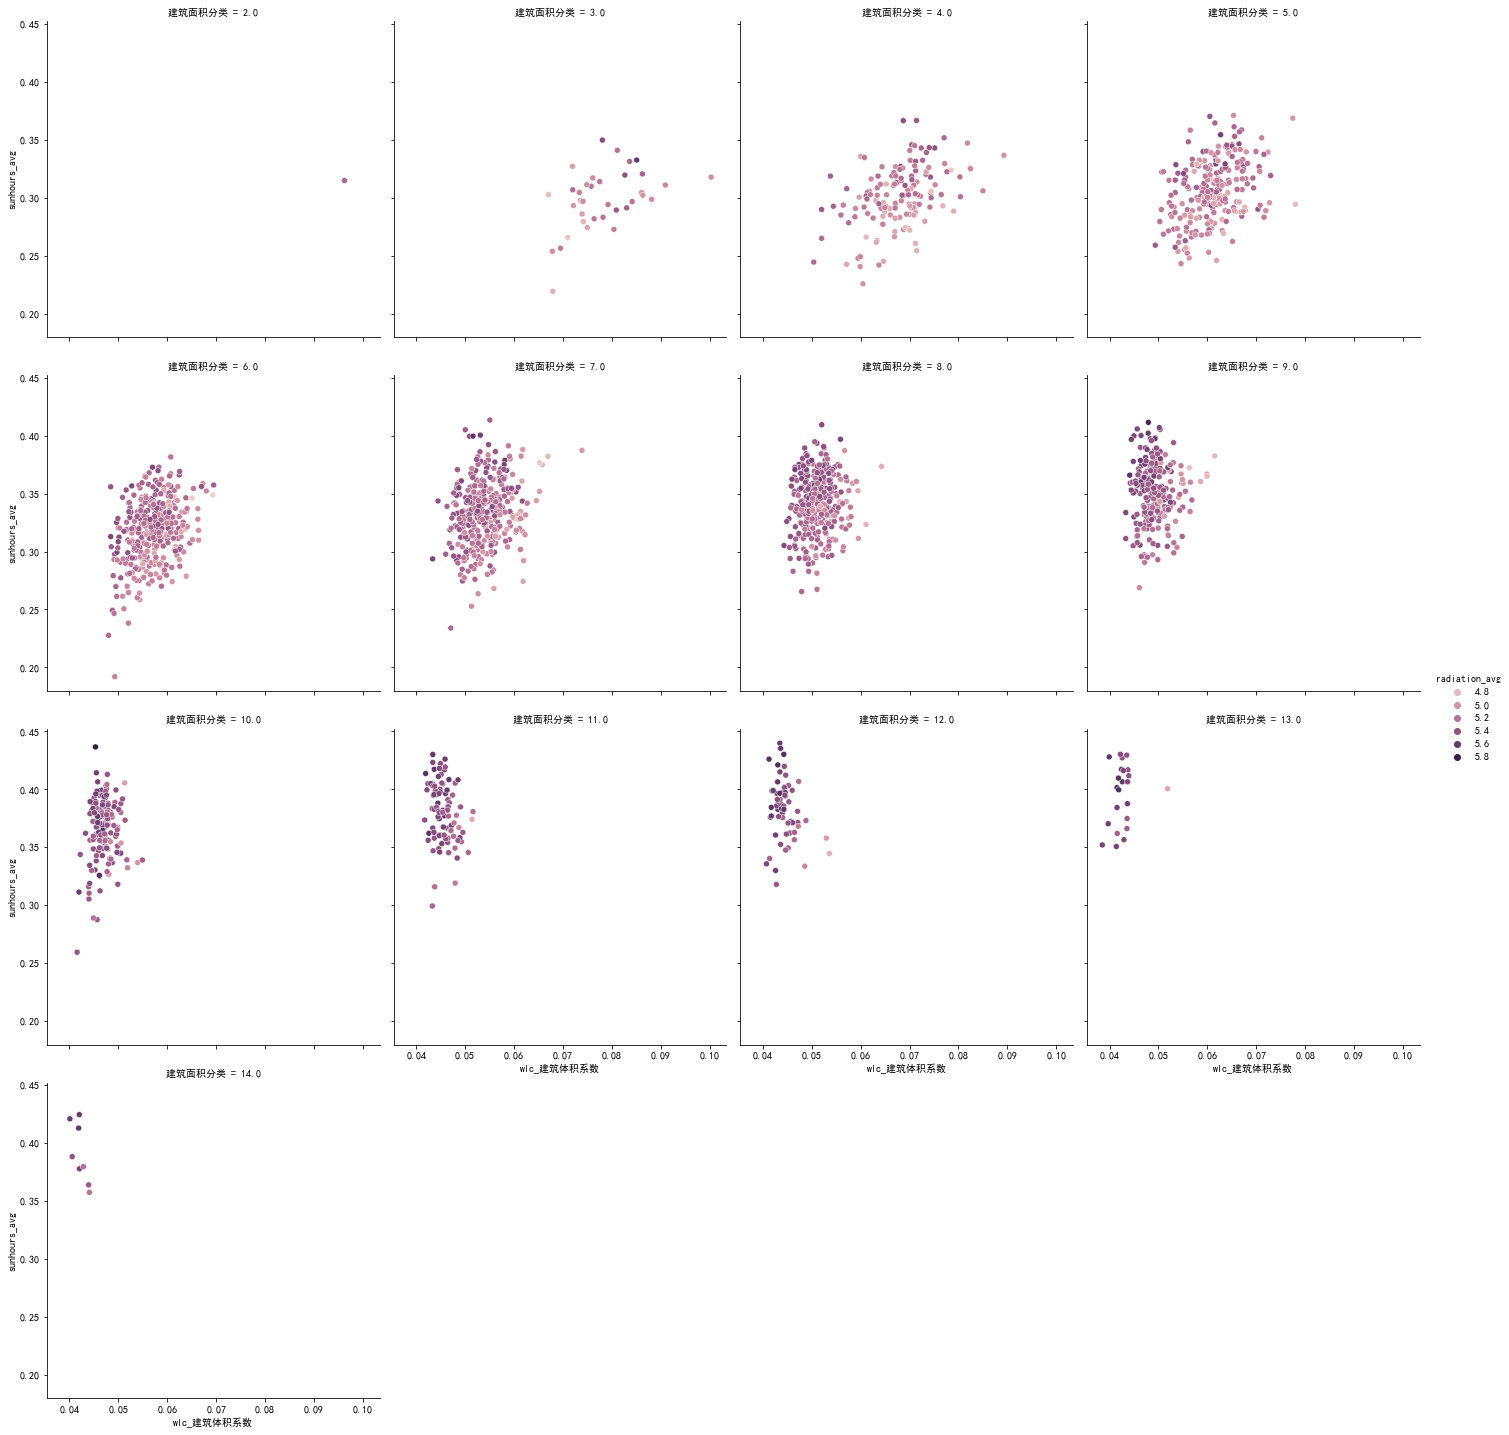

In [3]:
sns.relplot(x="wlc_建筑体积系数", y="sunhours_avg",hue="radiation_avg", col="建筑面积分类", col_wrap=4, data=df)

线图

In [ ]:
sns.lineplot(x="X4", y="sunhours", data=df)

In [ ]:
sns.relplot(x="X4", y="sunhours", kind="line", ci="sd", data=df)

In [ ]:
sns.relplot(x="wlc_建筑表面积", y="sunhours", kind="line", data=df)

In [ ]:
sns.relplot(x="wlc_平均层数", y="sunhours_avg",hue="建筑面积分类", estimator=None, kind="line", data=df)

In [ ]:
df['建筑面积分类']=df['wlc_建筑面积']//200000
sns.relplot(x="wlc_平均层数", y="sunhours_avg",col="建筑面积分类", estimator=None, kind="line", data=df)

# 相关性

In [ ]:
# ana_df=df.loc[:,"radiation":]
ana_df=df.loc[:,:"radiation"]
corr=ana_df.corr(method='pearson')

# print(corr)
plt.figure(figsize=(20,20))

sns.heatmap(corr,cmap='Blues',annot=True)
plt.savefig('filename2.png', dpi = 300)